In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [7]:
# remove duplicates
red_wine.drop_duplicates(inplace=True)
white_wine.drop_duplicates(inplace=True)

In [8]:
# Let's have a look at the outliers
# What can we do about them?
# Do they say us anything?

# Visualize

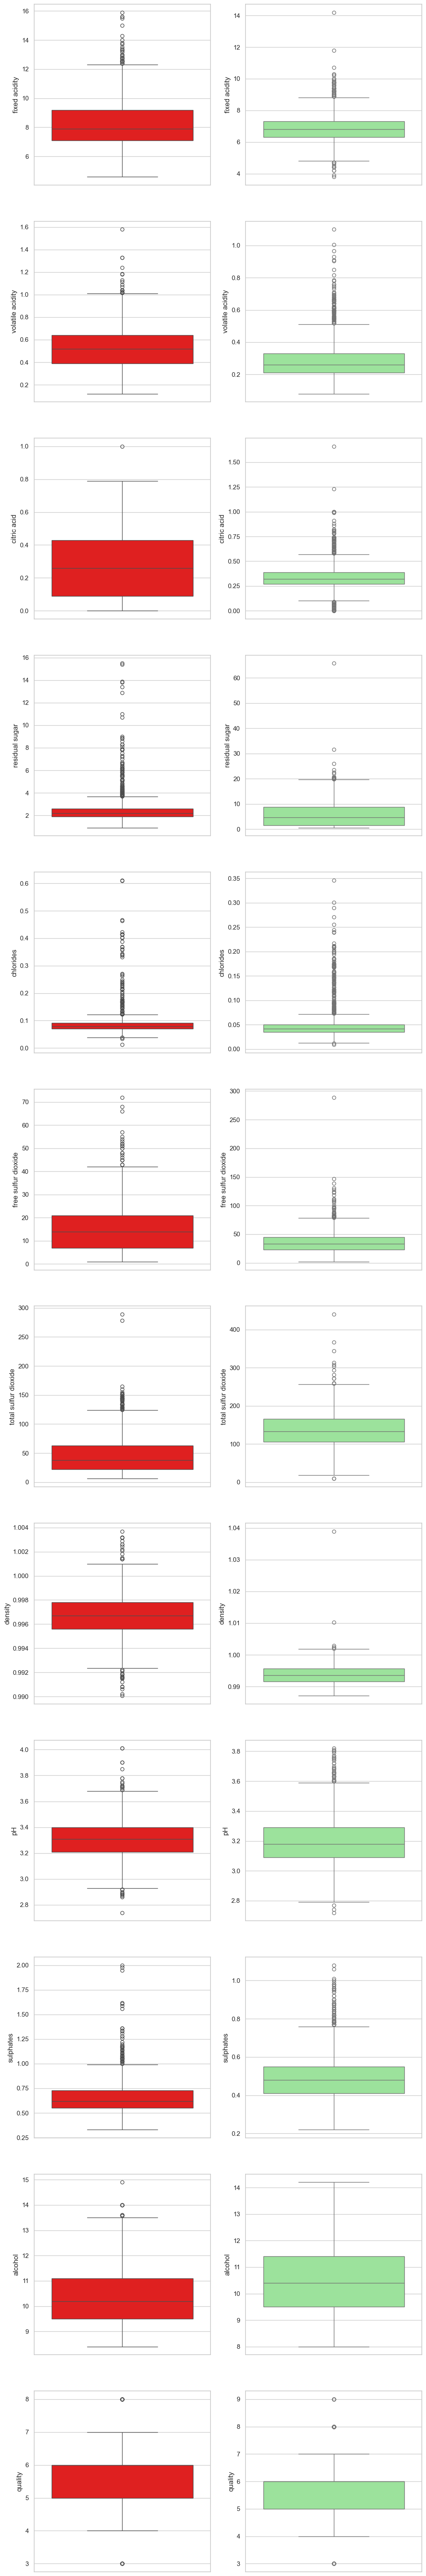

In [9]:
# let's show them first using boxplots

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(12, 2, figsize=(12, 10 * len(white_wine.describe())))

for i, parameter in enumerate(white_wine.describe().columns):
    sns.boxplot(data=red_wine, y=parameter, color='red', ax=axes[i, 0])
    sns.boxplot(data=white_wine, y=parameter, color='lightgreen', ax=axes[i, 1])

# show the plot
plt.show()

In [10]:
# We can see that almost all categories have an substantial amount of outliers
# Citric acid in red wine and alcohol in white wine are exceptions

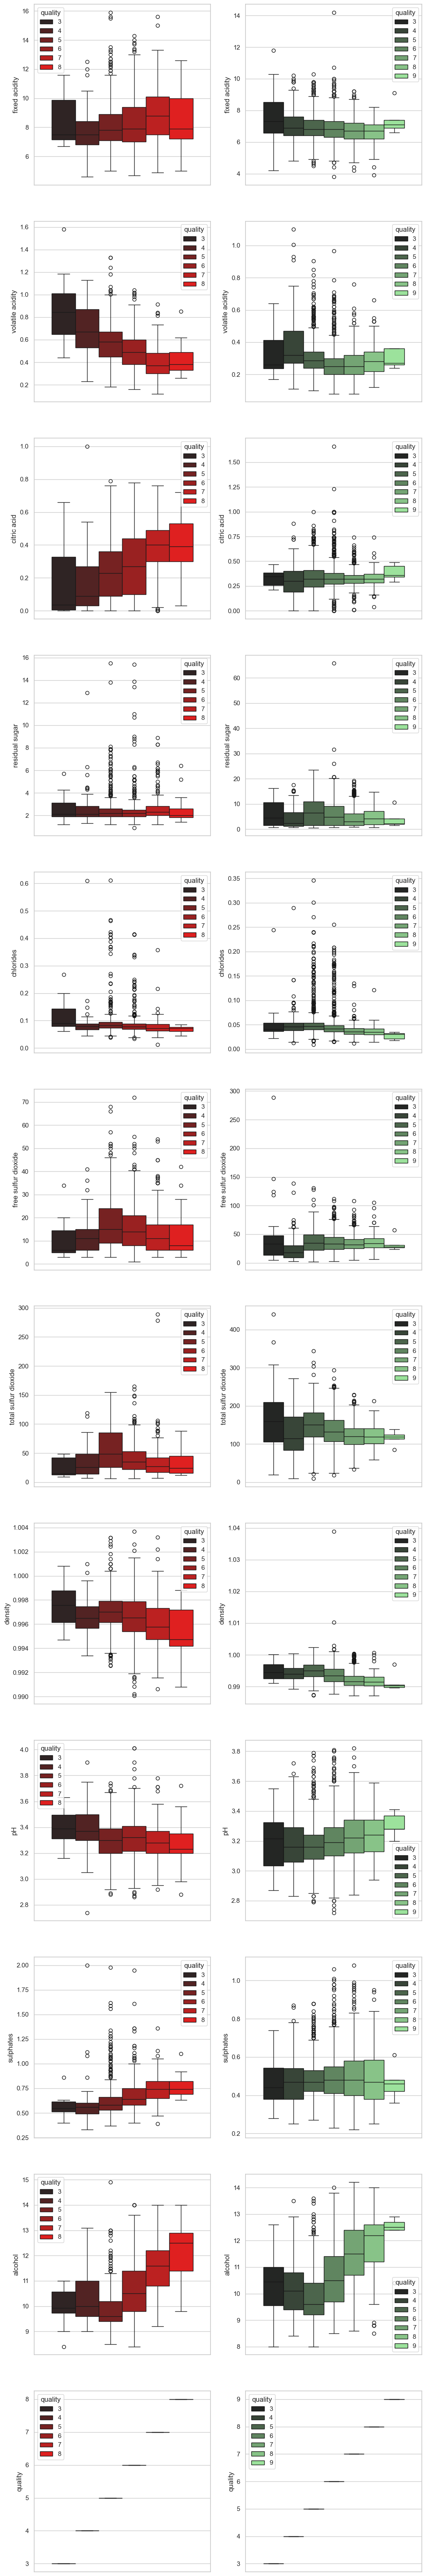

In [11]:
# let's see if the outliers are focused arround any specific quality values

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(12, 2, figsize=(12, 10 * len(white_wine.describe())))

for i, parameter in enumerate(white_wine.describe().columns):
    sns.boxplot(data=red_wine, y=parameter, hue='quality', palette='dark:red', ax=axes[i, 0])
    sns.boxplot(data=white_wine, y=parameter, hue='quality', palette='dark:lightgreen', ax=axes[i, 1])

# show the plot
plt.show()

In [12]:
# There seems to be less outliers for the best and worst quality wine

# Count and identify

In [13]:
# let's have a look at the number of outliers

def identify_outliers(df, column, threshold=1.5):
    """
    Identify potential outliers in a DataFrame column using the Interquartile Range (IQR) method.
    Returns a DataFrame with rows containing potential outliers based on the specified column.
    """

    # claculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # make a df with only outliers
    outliers = (df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)
    outliers_df = df[outliers]
    return outliers_df

In [14]:
print("RED WINE outliers amount")

# make dict to store the data
red_outliers = {}

# claculate amount of outliers for each feature
for feature in red_wine.describe().columns:
    red_outliers[feature] = len(identify_outliers(red_wine, feature))

# convert the data to a pd df
red_outliers_df = pd.DataFrame(list(red_outliers.items()), columns=['feature', 'quantity'])

# print the sorted data
red_outliers_df.sort_values(by='quantity', ascending=False)

RED WINE outliers amount


,feature,quantity
3,residual sugar,126
4,chlorides,87
9,sulphates,55
6,total sulfur dioxide,45
0,fixed acidity,41
7,density,35
8,pH,28
11,quality,27
5,free sulfur dioxide,26
1,volatile acidity,19


In [15]:
print("WHITE WINE outliers amount")

# make dict to store the data
white_outliers = {}

# claculate amount of outliers for each feature
for feature in white_wine.describe().columns:
    white_outliers[feature] = len(identify_outliers(white_wine, feature))

# convert the data to a pd df
white_outliers_df = pd.DataFrame(list(white_outliers.items()), columns=['feature', 'quantity'])

# print the sorted data
white_outliers_df.sort_values(by='quantity', ascending=False)

WHITE WINE outliers amount


,feature,quantity
2,citric acid,223
4,chlorides,178
11,quality,156
1,volatile acidity,133
0,fixed acidity,106
9,sulphates,96
8,pH,46
5,free sulfur dioxide,44
3,residual sugar,16
6,total sulfur dioxide,14


In [16]:
# chlorides seem to be a strong outlier in both
# residual sugar in red wine
# acidity related parameters in white wine

In [17]:
identify_outliers(white_wine, 'quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
158,5.2,0.440,0.04,1.4,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,8
188,6.8,0.530,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


In [18]:
# This makes no sense... high quality shouldn't be an outlier